# <span style="font-family: Arial; font-weight:bold;font-size:2em;color:gold;">UNSUPERVISED LEARNING PROJECT

#### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:gold;">-Saif Merchant

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.decomposition import PCA

###### <span style="font-family: Arial;font-size:2em;color:#00FFFF;">PART A


### Q1.1

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">a- Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [2]:
car = pd.read_csv("C:/Users/SAIF MERCHANT/Desktop/Great Learning/Unsupervised Learning/Project/Part1+-+Car+name.csv")

In [3]:
car

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
393,ford mustang gl
394,vw pickup
395,dodge rampage
396,ford ranger


###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">b - Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [4]:
attribute = pd.read_json("C:/Users/SAIF MERCHANT/Desktop/Great Learning/Unsupervised Learning/Project/Part1+-+Car-Attributes.json")

In [5]:
attribute

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">c - Merge both the DataFrames together to form a single DataFrame

In [6]:
car_data = car.join(attribute)

In [7]:
car_data

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">d - Print 5 point summary of the numerical features and share insights. 

In [8]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


### Insights
* These statistics give a quick overview of the central tendencies, variability, and ranges of each attribute in the dataset. 
* The dataset appears to contain details regarding the fuel economy, number of cylinders, engine displacement, weight, acceleration, manufacturing year, and country of origin of the car. This collection contains details about 398 automobiles. 
* It includes information on characteristics such as fuel efficiency (calculated in miles per gallon), the number of cylinders in the engine, engine displacement, vehicle weight, acceleration, production year, and country of origin.
* The vehicles' fuel economy spans from 9 to 46.6 miles per gallon, while their cylinder counts are between 3 and 8. 
* The automobiles in the dataset, which covers the years 1970 to 1982, originate from various origins, with the majority lying between 1 and 2.



The `hp` feature wasn't included in the summary as it is apparently considered as object nd shall be delt with furter in the project

### 1.2

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">a - Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [9]:
missing_values = car_data.isnull().sum()
missing_percentage = (missing_values / len(car_data)) * 100
print("Missing Percentage for Each Feature:")
print(missing_percentage)

Missing Percentage for Each Feature:
car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


There seem to be no missing values in the data by eye test and hence, no imputations can be made as of now. Lets get in to the core of this in Ques 1.2.h and investigate further.

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;"> b - Check for duplicate values in the data and impute with the best suitable approach.

In [10]:
car_data.duplicated().sum()

0

In [11]:
duplicate_rows = car_data[car_data.duplicated()]
print("Duplicate Rows:",duplicate_rows)

Duplicate Rows: Empty DataFrame
Columns: [car_name, mpg, cyl, disp, hp, wt, acc, yr, origin]
Index: []


There are no duplicate values present

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">c - Plot a pairplot for all features.

In [12]:
plt.style.use('default')

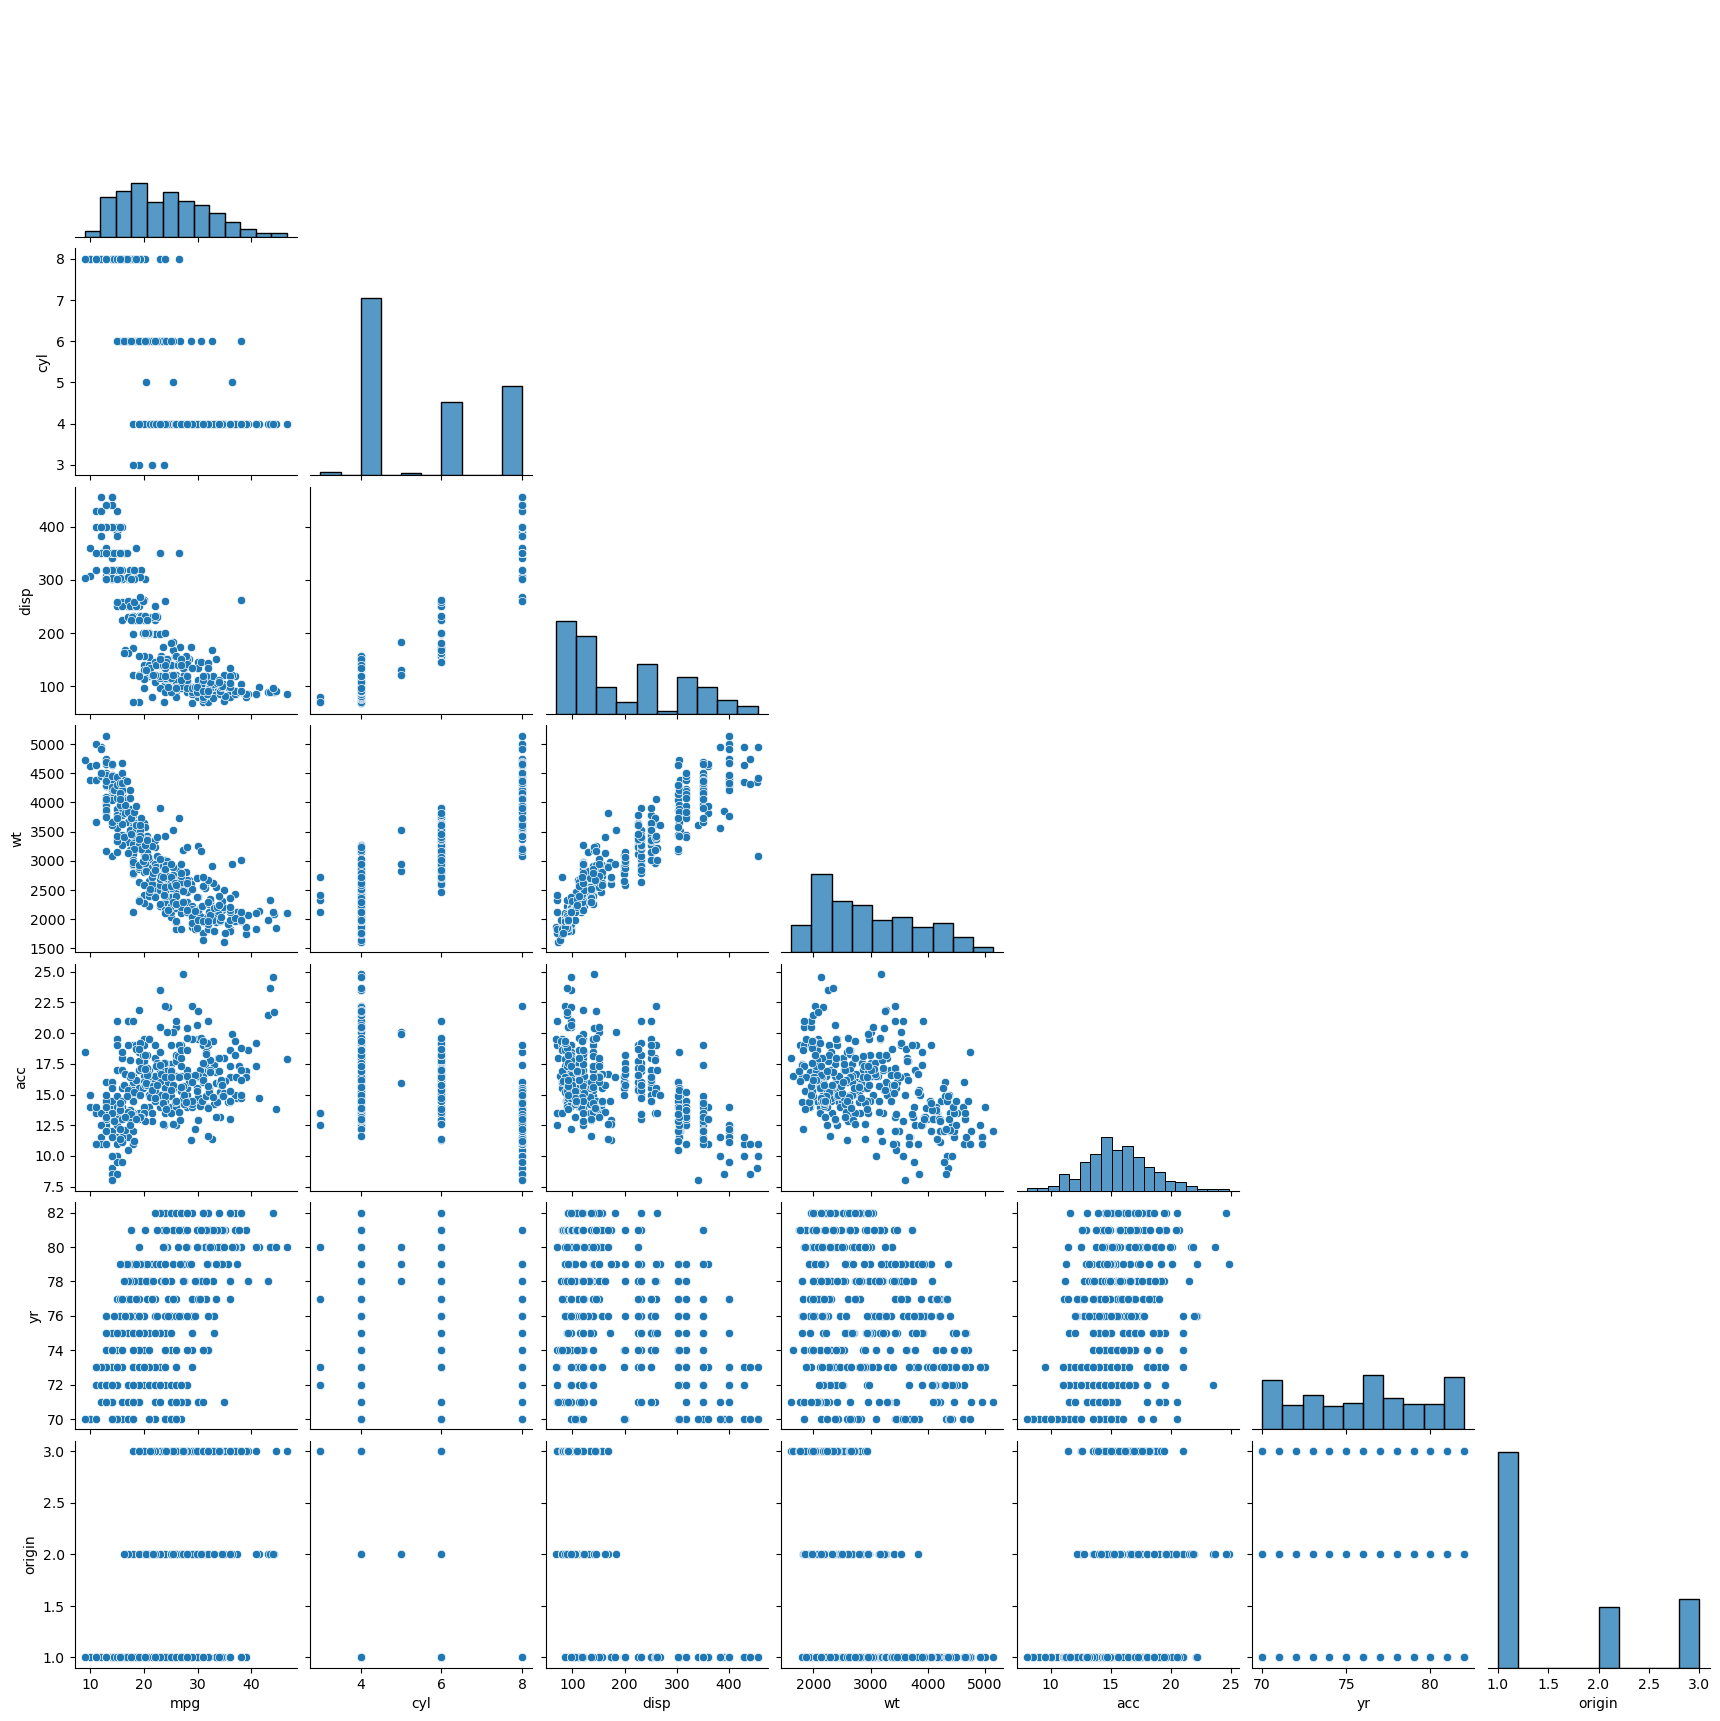

In [13]:
sns.pairplot(data = car_data,palette = 'dark',corner = True);

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">d - Visualize a scatterplot for ‘wt’ and ‘disp’.Datapoints should be distinguishable by ‘cyl’.

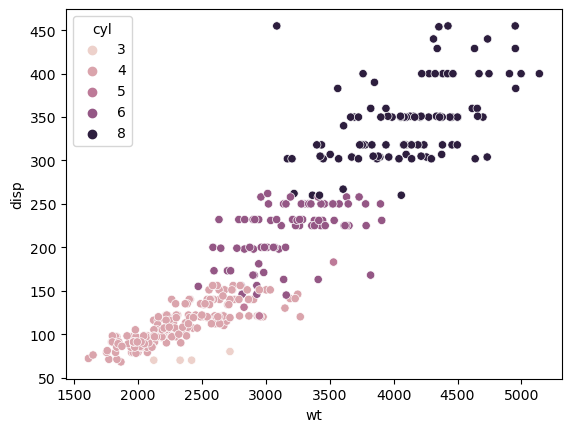

In [14]:
sns.scatterplot(data = car_data,x = 'wt',y = 'disp',hue = 'cyl');

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">e - Share insights for Q2.d.

### Insights
*  The scatter plot depicts the link between an engine's weight (x-axis), number of cylinders, and displacement (y-axis). Since all of the factors are positively correlated, the displacement tends to grow as the number of cylinders does as well. There are some outliers, therefore the correlation isn't perfect.
    * In general, more cylinders means more displacement.
    * There is a range of displacement for each number of cylinders.
    * There are some outliers, which means that not all engines with the same 
      number of cylinders have the same displacement.
    * The correlation between the number of cylinders and displacement is not perfect, 
      meaning that there are other factors that affect displacement, such as the size 
      of the engine and the type of fuel it uses.
* The link between the two is distinguished by the number of cylinders, which rather obviously shows that even the number of cylinders rises as displacement and weight grow.

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">f - Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

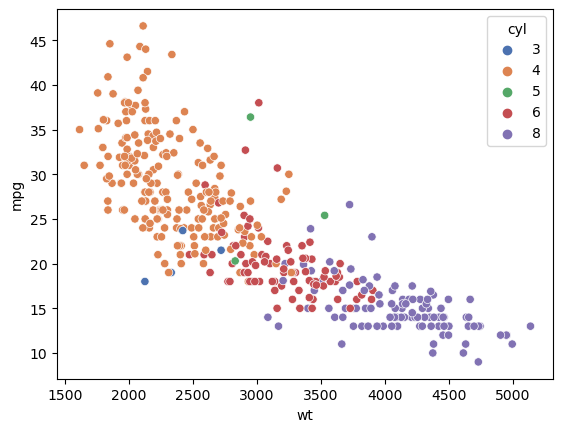

In [15]:
sns.scatterplot(data = car_data,x = 'wt',y = 'mpg',hue = 'cyl',palette = 'deep');

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;"> g- Share insights for Q2.f.

### Insights
* The scatter plot shows the relationship between the number of cylinders in an engine,,wt (x-axis) and the fuel efficiency (mpg) of the engine (y-axis). 
* There is a negative correlation between the variables, meaning that as the fuel efficiency increases,the weight of the cars tend to decrease.
* In general, fewer cylinders means better fuel efficiency.
* There is a negative correlation between the number of cylinders and fuel efficiency.
* There are some outliers, which means that not all engines with the same number of cylinders have the same fuel efficiency.
* Other factors, like weight in the x-axis is also affecting fuel efficiency.
* A small, lightweight engine with 4 cylinders can be very fuel-efficient.

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">h - Check for unexpected values in all the features and datapoints with such values.

With eye test, there seems no NaN values; Lest confirm by having a glance at the datatypes

In [16]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


hp should have been integer, buts appears to be object; lets investigate further

In [17]:
car_data['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

There are few '?' in some rows

In [18]:
car_data['hp'].apply(type).value_counts()

<class 'int'>    392
<class 'str'>      6
Name: hp, dtype: int64

There are 6 '?';
* Lets convert the '?' to NaN Values,convert the data types and then do some imputations

In [19]:
car_data['hp'] = car_data['hp'].replace(['?'],np.nan)
car_data['hp'] = car_data['hp'].astype('float')

print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        392 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB
None


Lets drop the NaN values as if we do imputation it will affect the clustering

In [20]:
car_data = car_data.dropna()

In [21]:
car_data

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1


Saving a copy of the df

In [22]:
car_data_copy = car_data.copy()

### 1.3

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">a - Apply K-Means clustering for 2 to 10 clusters

The data has few objects and the units of certain variables are different so lets scale the data first

In [23]:
car_data_temp = car_data.iloc[:,1:]
car_scaled = car_data_temp.apply(zscore)

### The K-Means clustering for 2 to 10 clusters can be done by 2 Methods

Method 1 : Computing K-means inrtia using Scikit-learn's builtin Functionality

In [24]:
k_values_1 = range(2, 11)
inertia_values_method1 = []

for k in k_values_1:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(car_scaled)
    inertia_values_method1.append(kmeans.inertia_)      

### AND

Method 2 : Calculating inertia manually

In [25]:
k_values_1 = range(2, 11)
inertia_values_method1 = []

for k in k_values_1:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(car_scaled)
    inertia_values_method1.append(kmeans.inertia_)      

k_values_2=range(2,11)
inertia_values_method2=[]

for k in k_values_2:
    model=KMeans(n_clusters=k)
    model.fit(car_scaled)
    prediction=model.predict(car_scaled)
    inertia_values_method2.append(sum(np.min(cdist(car_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / car_scaled.shape[0])

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">b - Plot a visual and find elbow point. 

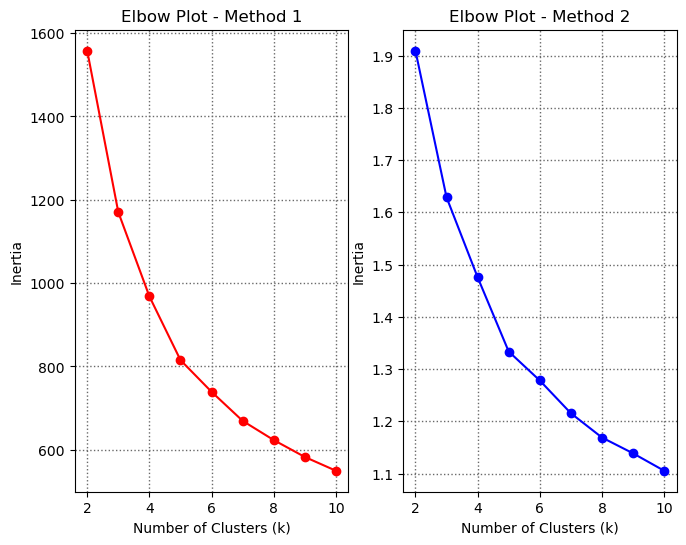

In [26]:
plt.figure(figsize=(12, 6))

# Elbow plot for Method 1
plt.subplot(1, 3, 1)
plt.plot(k_values_1, inertia_values_method1, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot - Method 1')
plt.style.use('default')
plt.grid(ls = 'dotted',c = 'dimgray',lw = 1)

# Elbow plot for Method 2
plt.subplot(1, 3, 2)
plt.plot(k_values_2, inertia_values_method2, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot - Method 2')
plt.style.use('default')
plt.grid(ls = 'dotted',c = 'dimgray',lw = 1)

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;"> c - On the above visual, highlight which are the possible Elbow points.

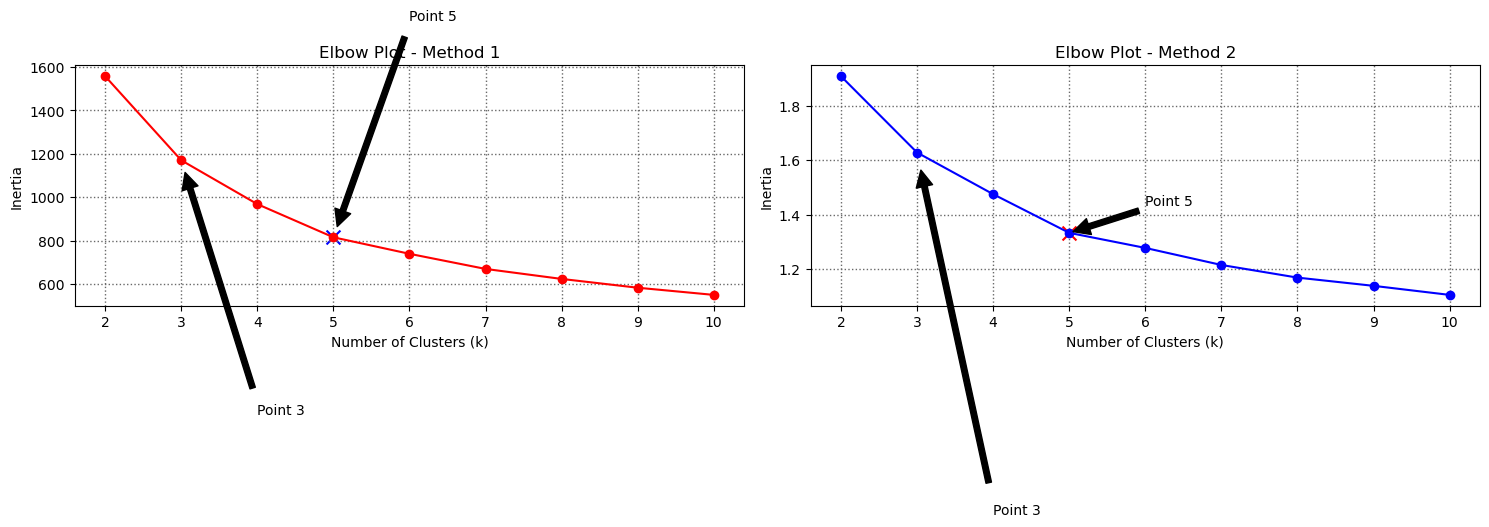

In [27]:
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.plot(k_values_1, inertia_values_method1, 'ro-')
plt.scatter(5, inertia_values_method1[3], color='blue', marker='x', s=100)  # Highlight point 5
plt.annotate('Point 5', xy=(5, inertia_values_method1[3]), xytext=(6, inertia_values_method1[3] + 1000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.annotate('Point 3', xy=(3, inertia_values_method1[1]), xytext=(4, 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot - Method 1')
plt.grid(ls='dotted', c='dimgray', lw=1)

plt.subplot(1, 2, 2)
plt.plot(k_values_2, inertia_values_method2, 'bo-')
plt.scatter(5, inertia_values_method2[3], color='red', marker='x', s=100)  # Highlight point 5
plt.annotate('Point 5', xy=(5, inertia_values_method2[3]), xytext=(6, inertia_values_method2[3] + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.annotate('Point 3', xy=(3, inertia_values_method2[1]), xytext=(4, 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot - Method 2')
plt.grid(ls='dotted', c='dimgray', lw=1)

plt.tight_layout()
plt.show()

###### <span style="font-family: Arial;font-size:2em;color:#FFD700;">According to me the possible elbow point from the plot are 3 and 5. But 5 provides more accurate visuals for the datapoints beyond 5. Hence we shall consider 5 as our optimal Elbow point 

<span style="font-family: Arial;font-size:2em;color:#FF69B4;">Lets condider Method 2 as our ideal elbow graph from now on and continue further

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">d - Train a K-means clustering model once again on the optimal number of clusters.

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">e - Add a new feature in the DataFrame which will have labels based upon cluster value

In [28]:
model_with_5 = KMeans(5, random_state=42)
model_with_5.fit(car_scaled)
prediction_with_5 = model_with_5.predict(car_scaled)
car_data["GROUP_with_5_clusters"] = prediction_with_5
car_data

C:\Users\SAIFME~1\AppData\Local\Temp/ipykernel_28280/1167391282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data["GROUP_with_5_clusters"] = prediction_with_5


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP_with_5_clusters
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,1
...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1,2
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2,3
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1,2
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1,2


In [29]:
car_data['GROUP_with_5_clusters'].value_counts().sort_index() 

0    83
1    94
2    65
3    70
4    80
Name: GROUP_with_5_clusters, dtype: int64

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">f -Plot a visual and color the datapoints based upon clusters.

C:\Users\SAIFME~1\AppData\Local\Temp/ipykernel_28280/4172429463.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60);
C:\Users\SAIFME~1\AppData\Local\Temp/ipykernel_28280/4172429463.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c = labels.astype(np.float), edgecolor='k');


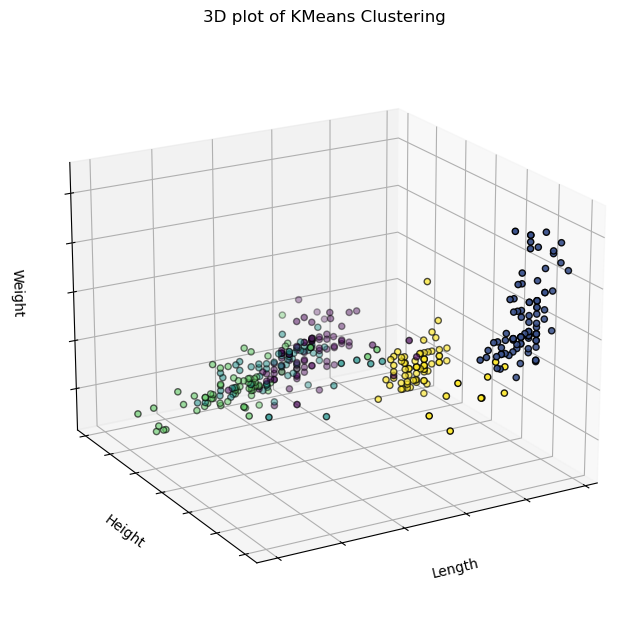

In [30]:
fig = plt.figure(figsize=(8, 6));
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60);
model_with_5.fit(car_scaled)
labels = model_with_5.labels_
ax.scatter(car_scaled.iloc[:, 0], car_scaled.iloc[:, 1], car_scaled.iloc[:, 3],
           c = labels.astype(np.float), edgecolor='k');
ax.w_xaxis.set_ticklabels([]);
ax.w_yaxis.set_ticklabels([]);
ax.w_zaxis.set_ticklabels([]);
ax.set_xlabel('Length');
ax.set_ylabel('Height');
ax.set_zlabel('Weight');
ax.set_title('3D plot of KMeans Clustering');

### Alternatively

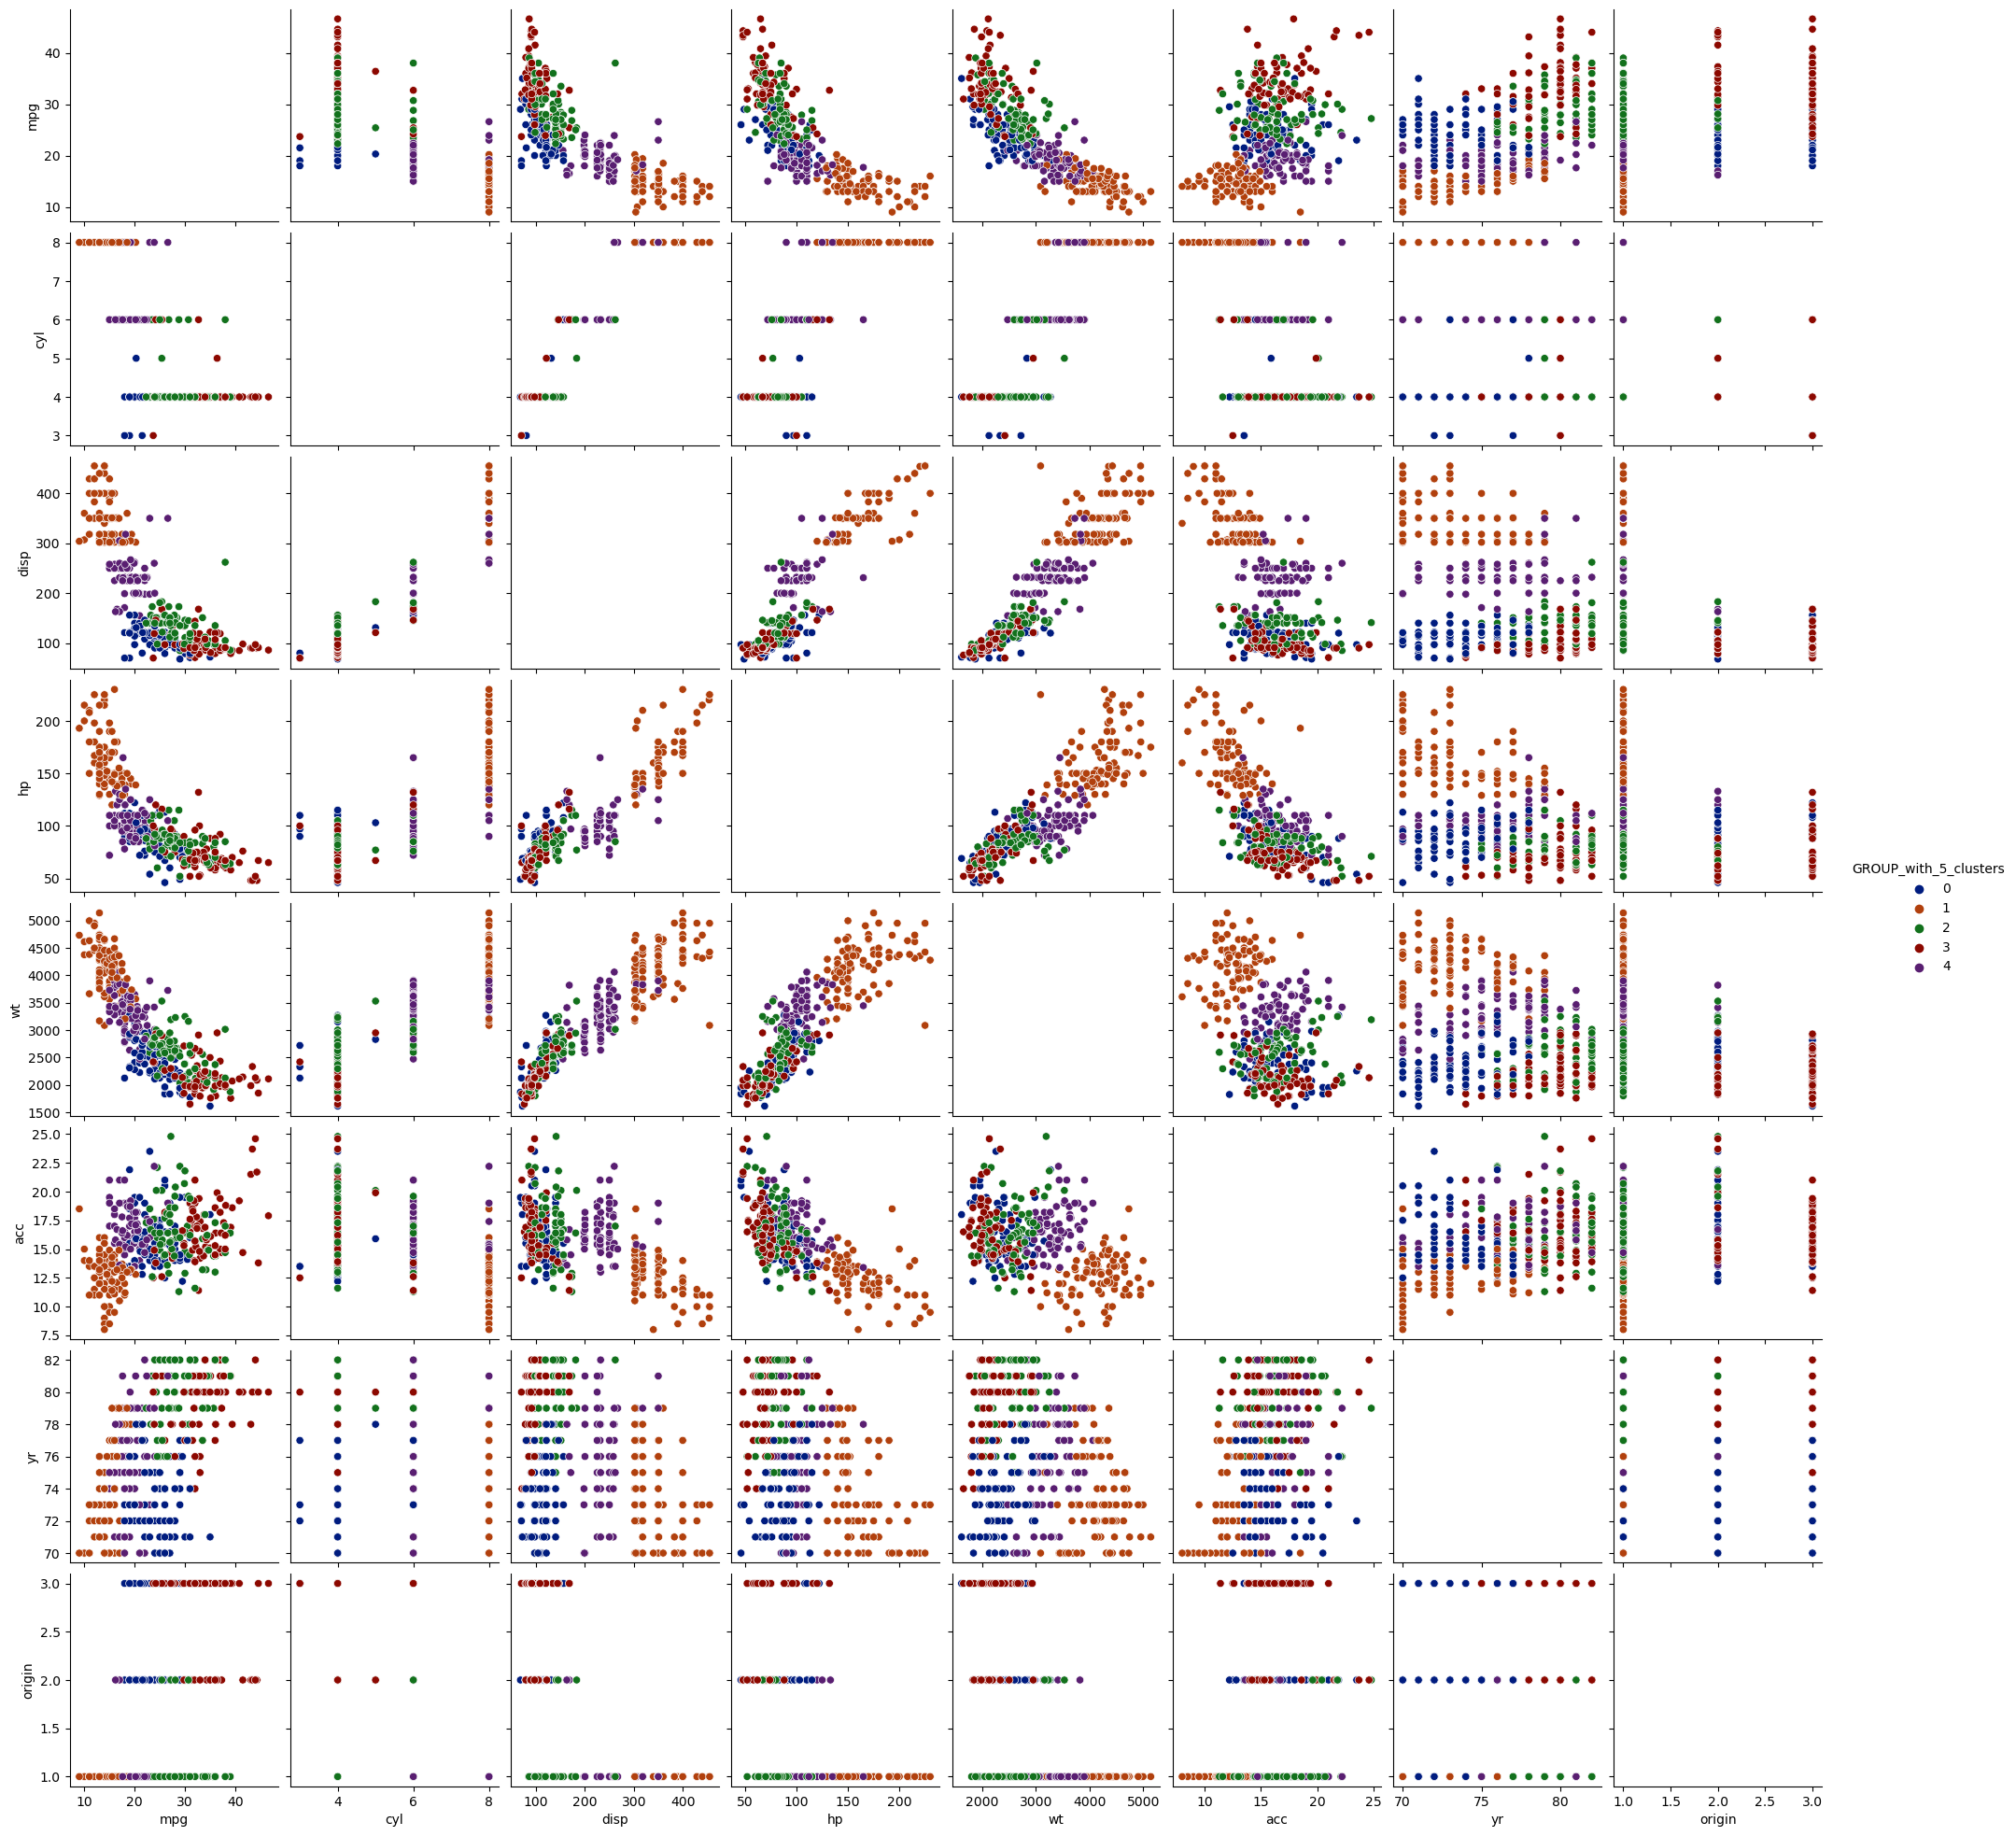

In [31]:
sns.pairplot(car_data,diag_kind = 'hue',hue = 'GROUP_with_5_clusters',palette = 'dark');

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">g - Pass a new DataPoint and predict which cluster it belongs to.

Creating a new dataframe with random values and scaling them manually as no inbulilt scaling method can be applied for just 1 row

In [32]:
import pandas as pd
from scipy import stats

data = {
    'mpg': pd.Series([18.5]),
    'cyl': pd.Series([5]),
    'disp': pd.Series([99]),
    'hp': pd.Series([80]),
    'wt': pd.Series([2000]),
    'acc': pd.Series([67]),
    'yr' : pd.Series([76]),
    'origin': pd.Series([2])
}

data_df = pd.DataFrame(data)
mean = np.mean(car_data_copy,axis = 0)
std_dev = np.std(car_data_copy,axis = 0)
x = data_df
z_score = (x - mean) / std_dev
z_score

C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\SAIF MERCHANT\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3558: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.634495,-0.277023,-0.912942,-0.636527,-1.152379,18.67596,0.005547,0.526382


In [33]:
prediction_with_5_test = model_with_5.predict(z_score)
data_df["GROUP_with_5_clusters_test"] = prediction_with_5_test
data_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP_with_5_clusters_test
0,18.5,5,99,80,2000,67,76,2,3


######  <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#FFD700;">The new record belongs to 3rd Cluster out of 5

###### <span style="font-family: Arial;font-size:2em;color:#00FFFF;">PART B


### Q2.1

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">a - Read ‘vehicle.csv’ and save as DataFrame.

In [34]:
vehicle = pd.read_csv("C:/Users/SAIF MERCHANT/Desktop/Great Learning/Unsupervised Learning/Project/vehicle.csv")

In [35]:
vehicle

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;"> b- Check percentage of missing values and impute with correct approach.

In [36]:
pd.DataFrame({'Count' : vehicle.isnull().sum()[vehicle.isnull().sum() > 0],
             'Percentage' : (vehicle.isnull().sum()[vehicle.isnull().sum() > 0]/vehicle.shape[0])*100})

,Count,Percentage
circularity,5,0.591017
distance_circularity,4,0.472813
radius_ratio,6,0.709220
pr.axis_aspect_ratio,2,0.236407
scatter_ratio,1,0.118203
elongatedness,1,0.118203
pr.axis_rectangularity,3,0.354610
scaled_variance,3,0.354610
scaled_variance.1,2,0.236407
scaled_radius_of_gyration,2,0.236407


##### Replacing the null values with median of that particular class

In [37]:
vehicle.groupby(['class'])[['circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio',
                            'scatter_ratio','elongatedness','scaled_variance','scaled_variance.1',
                            'scaled_radius_of_gyration.1','skewness_about','skewness_about.1',
                         'pr.axis_rectangularity','scaled_radius_of_gyration','skewness_about.2']].median()

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,scaled_variance,scaled_variance.1,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,pr.axis_rectangularity,scaled_radius_of_gyration,skewness_about.2
class,,,,,,,,,,,,,,
bus,44.0,72.0,167.5,64.0,152.0,44.0,177.0,344.0,76.0,5.0,10.0,19.0,176.0,186.0
car,46.0,94.0,186.0,61.0,185.0,36.0,206.0,512.0,70.0,6.0,14.0,22.0,182.0,189.0
van,42.0,75.0,144.0,59.0,142.0,47.0,164.0,300.0,72.0,6.0,9.0,18.0,159.0,188.0


In [38]:
vehicle['circularity'] = vehicle['circularity'].fillna(value = vehicle.groupby(['class'])
                                     ['circularity'].transform('median'))   

In [39]:
vehicle['distance_circularity'] = vehicle['distance_circularity'].fillna(value = vehicle.groupby(['class'])
                                     ['distance_circularity'].transform('median'))   

In [40]:
vehicle['scatter_ratio'] = vehicle['scatter_ratio'].fillna(value = vehicle.groupby(['class'])
                                     ['scatter_ratio'].transform('median'))   

In [41]:
vehicle['elongatedness'] = vehicle['elongatedness'].fillna(value = vehicle.groupby(['class'])
                                     ['elongatedness'].transform('median'))   

In [42]:
vehicle['pr.axis_rectangularity'] = vehicle['pr.axis_rectangularity'].fillna(value = vehicle.groupby(['class'])
                                     ['pr.axis_rectangularity'].transform('median'))   

In [43]:
vehicle['scaled_radius_of_gyration'] = vehicle['scaled_radius_of_gyration'].fillna(value = vehicle.groupby(['class'])
                                     ['scaled_radius_of_gyration'].transform('median'))   

In [44]:
vehicle['skewness_about'] = vehicle['skewness_about'].fillna(value = vehicle.groupby(['class'])
                                     ['skewness_about'].transform('median'))   

In [45]:
vehicle['radius_ratio'] = vehicle['radius_ratio'].fillna(value = vehicle.groupby(['class'])
                                     ['radius_ratio'].transform('median'))   

In [46]:
vehicle['pr.axis_aspect_ratio'] = vehicle['pr.axis_aspect_ratio'].fillna(value = vehicle.groupby(['class'])
                                     ['pr.axis_aspect_ratio'].transform('median'))   

In [47]:
vehicle['scaled_variance'] = vehicle['scaled_variance'].fillna(value = vehicle.groupby(['class'])
                                     ['scaled_variance'].transform('median'))   

In [48]:
vehicle['scaled_variance.1'] = vehicle['scaled_variance.1'].fillna(value = vehicle.groupby(['class'])
                                     ['scaled_variance.1'].transform('median'))   

In [49]:
vehicle['scaled_radius_of_gyration.1'] = vehicle['scaled_radius_of_gyration.1'].fillna(value = vehicle.groupby(['class'])
                                     ['scaled_radius_of_gyration.1'].transform('median'))   

In [50]:
vehicle['skewness_about.1'] = vehicle['skewness_about.1'].fillna(value = vehicle.groupby(['class'])
                                     ['skewness_about.1'].transform('median'))   

In [51]:
vehicle['skewness_about.2'] = vehicle['skewness_about.2'].fillna(value = vehicle.groupby(['class'])
                                     ['skewness_about.2'].transform('median'))   

In [52]:
missing_values = vehicle.isnull().sum()
missing_percentage = (missing_values / len(car_data)) * 100
print("Missing Percentage for Each Feature:")
print(missing_percentage)

Missing Percentage for Each Feature:
compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64


###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;"> c- Visualize a Pie-chart and print percentage of values for variable ‘class’. 

In [53]:
def generate_pie_charts(dataframe):
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            value_counts = dataframe[column].value_counts()
            total_count = len(dataframe[column])
            
            percentages = [(count / total_count) * 100 for count in value_counts]
            labels = value_counts.index

            plt.figure(figsize=(6, 6))
            plt.style.use('default')
            plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90,shadow = True)
            plt.title(f'{column} - Percentage Distribution')
            plt.axis('equal')
            plt.show()

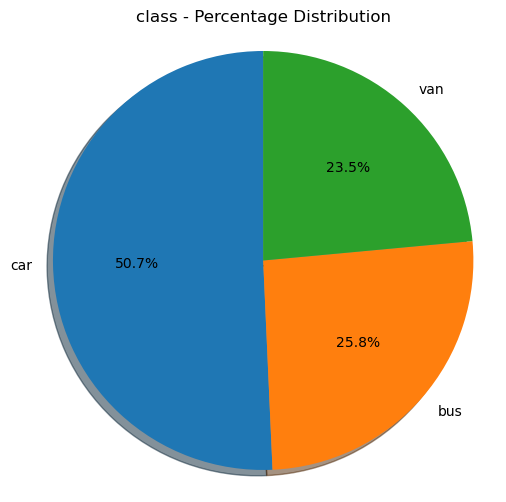

In [54]:
generate_pie_charts(vehicle)

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">d - Check for duplicate rows in the data and impute with correct approach. 

In [55]:
vehicle.duplicated().sum()

0

In [56]:
duplicate_rows = vehicle[vehicle.duplicated()]
print("Duplicate Rows:",duplicate_rows)

Duplicate Rows: Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []


There are no duplicate rows present

### 2.2

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;"> a - Split data into X and Y.

In [57]:
x = vehicle.iloc[: ,: 18]
y = vehicle['class']

In [58]:
vehicle

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [59]:
x

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195


In [60]:
y

0      van
1      van
2      car
3      van
4      bus
      ... 
841    car
842    van
843    car
844    car
845    van
Name: class, Length: 846, dtype: object

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">b - Standardize the Data.

In [61]:
x_scaled = x.apply(zscore)

In [62]:
x_scaled

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.517682,0.059308,0.271910,1.309886,0.311542,-0.208583,0.137295,-0.223684,0.758332,-0.403165,-0.343931,0.285523,-0.327232,-0.072834,0.380475,-0.312208,0.183957
1,-0.325470,-0.624110,0.122821,-0.835616,-0.594175,0.094079,-0.600383,0.521478,-0.609882,-0.344578,-0.594494,-0.621727,-0.513811,-0.059367,0.539264,0.156401,0.013073,0.452977
2,1.254193,0.843908,1.520094,1.199837,0.548262,0.311542,1.147649,-1.143315,0.934909,0.689401,1.095585,1.107410,1.392295,0.074565,1.559428,-0.403783,-0.149568,0.049447
3,-0.082445,-0.624110,-0.004204,-0.296819,0.167449,0.094079,-0.751075,0.649538,-0.609882,-0.344578,-0.913377,-0.740782,-1.466865,-1.264758,-0.072834,-0.291746,1.639478,1.529056
4,-1.054545,-0.134771,-0.766353,1.080105,5.244946,9.444962,-0.600383,0.521478,-0.609882,-0.275646,1.669575,-0.650073,0.408498,7.306912,0.539264,-0.179709,-1.450692,-1.699181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.082445,-0.950337,0.313358,0.421576,0.294387,-0.123383,0.002387,-0.118827,-0.223684,-0.964965,0.362155,-0.100151,-0.790504,-0.059367,0.131198,1.388806,-0.149568,-0.085062
842,-0.568495,0.191456,0.122821,-0.177087,0.548262,0.529004,-0.298998,0.265356,-0.223684,0.758332,-0.498829,-0.406293,0.039574,-0.059367,-1.092998,0.828622,-0.474849,0.183957
843,1.497218,1.496361,1.202532,1.588968,0.675199,0.746467,1.599726,-1.399437,1.707304,1.723379,1.255027,1.594971,0.777422,-0.327232,-0.684933,-0.963966,-0.312208,0.721997
844,-0.933032,-1.439676,-0.258254,-0.685950,-0.467238,-0.340845,-1.022321,1.161782,-0.996080,-1.654284,-1.072819,-0.961885,-0.821248,-0.862961,-1.297031,1.388806,0.175713,-0.085062


### 2.3

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">a - Train a base Classification model using SVM.

In [63]:
svm_model_initial = SVC()
svm_model_initial.fit(x_scaled,y)

SVC()

`I have chosen to fit the whole data to my model`

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">b - Print Classification metrics for train data

In [64]:
y_pred_initial_svm = svm_model_initial.predict(x_scaled)

###### 1 : Scores of training and Testing Data

In [65]:
print('Score for Training Data : ',round(svm_model_initial.score(x_scaled,y),3))

Score for Training Data :  0.981


###### 2 :  Accuracy

In [66]:
print(accuracy_score(y,y_pred_initial_svm))

0.9810874704491725


In [67]:
def rightly_identified(actual, predictions):
    a = pd.DataFrame()
    for i in np.sort(actual.unique()):
        try:
            a.loc[i,'total_instances'] = len(actual[actual == i])
            a.loc[i, 'identified_right'] = pd.Series(predictions[actual == i]).value_counts()[i]
            a.loc[i, '%'] = round(100*pd.Series(predictions[actual == i]).value_counts()[i]/len(actual[actual == i]), 1)
        except:
            a.loc[i, '%'] = 0.0
    return a

In [68]:
pred_vs_actual_initial_svm = rightly_identified(y, y_pred_initial_svm)

In [69]:
pred_vs_actual_initial_svm

,total_instances,identified_right,%
bus,218.0,214.0,98.2
car,429.0,421.0,98.1
van,199.0,195.0,98.0


###### 3 : Precison /  Sensitivity / F1_Score / Suppot

In [70]:
print(classification_report(y,y_pred_initial_svm))

              precision    recall  f1-score   support

         bus       0.99      0.98      0.98       218
         car       0.99      0.98      0.99       429
         van       0.95      0.98      0.97       199

    accuracy                           0.98       846
   macro avg       0.98      0.98      0.98       846
weighted avg       0.98      0.98      0.98       846



###### 4 : Confusion Matrix

In [71]:
def con_matrix(actual, predictions):
    from sklearn.metrics import confusion_matrix
    matrix = pd.DataFrame(confusion_matrix(actual, predictions), columns = np.unique(actual), index = np.unique(actual))
    matrix.loc[:,'total_count_actual_class'] = matrix.sum(axis = 1)
    matrix.loc['total_count_predicted'] = matrix.sum(axis = 0)
    return matrix

con_matrix(y, y_pred_initial_svm)

,bus,car,van,total_count_actual_class
bus,214,0,4,218
car,2,421,6,429
van,1,3,195,199
total_count_predicted,217,424,205,846


###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">c - Apply PCA on the data with 10 components. 

In [72]:
pca_model_with_ten_comp = PCA(n_components = 10)
pca_model_with_ten_comp.fit(x_scaled)

PCA(n_components=10)

In [73]:
cov_matrix = np.cov(x_scaled.T) 
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00118343  0.68636217  0.79059726  0.69053363  0.09198453  0.14842463
   0.81247773 -0.78905557  0.81440865  0.67694334  0.76351002  0.81833828
   0.58575426 -0.25053864  0.23701356  0.15789336  0.29887839  0.36598446]
 [ 0.68636217  1.00118343  0.79280285  0.62276075  0.15444546  0.25188188
   0.84770943 -0.8218075   0.84576918  0.96297741  0.79520193  0.84019363
   0.92731344  0.05233142  0.14471964 -0.01144512 -0.10494782  0.04657999]
 [ 0.79059726  0.79280285  1.00118343  0.76908912  0.15929452  0.26536555
   0.90342716 -0.91177521  0.89389345  0.77443553  0.86160468  0.8884694
   0.70519293 -0.22829105  0.11406664  0.2671402   0.14777577  0.33545957]
 [ 0.69053363  0.62276075  0.76908912  1.00118343  0.66406299  0.44997021
   0.73468321 -0.7910345   0.70996999  0.57016627  0.79519036  0.72247019
   0.53726381 -0.18215173  0.05120657  0.17524855  0.38354044  0.47224412]
 [ 0.09198453  0.15444546  0.15929452  0.66406299  1.00118343  0.64920931
   0.10360911

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">d - Visualize Cumulative Variance Explained with Number of Components. 

In [74]:
pca_model_with_ten_comp.explained_variance_ratio_

array([0.52200175, 0.16743902, 0.10556694, 0.06548539, 0.05093994,
       0.0299648 , 0.01990839, 0.01234785, 0.00885312, 0.0050885 ])

In [75]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[ 2.75303704e-01  1.26699824e-01  1.20021442e-01 -7.87086696e-02
  -6.97518075e-02  1.43038819e-01  4.52605129e-01  5.64905205e-01
   4.84676252e-01  2.62889961e-01 -4.68654021e-02  1.11812699e-02
  -1.61538327e-01 -2.04375959e-03 -1.25235569e-03  5.49081564e-02
   5.25525969e-02 -6.28227375e-03]
 [ 2.93255195e-01 -1.25798029e-01  2.45130070e-02 -1.88672829e-01
   8.54644264e-02 -3.01212046e-01 -2.49743783e-01  1.78490304e-01
   1.87631464e-02 -1.01561315e-01  3.14194656e-03 -1.94628649e-01
  -2.29982476e-02  2.44082272e-02 -8.98379225e-02  3.78071743e-01
  -4.29962688e-01  5.33062551e-01]
 [ 3.04416264e-01  7.40164089e-02  5.56481927e-02  7.13302354e-02
  -3.97009403e-02 -1.40604801e-01  7.29693451e-02 -4.35523432e-01
   1.68090253e-01  2.09160196e-01 -7.06269499e-01 -2.49131951e-02
   2.26430189e-01  4.67468062e-05  2.41549813e-02 -5.38528246e-02
   1.42473241e-01  1.75567894e-01]
 [ 2.67824695e-01  1.89664273e-01 -2.74351923e-01  4.21775267e-02
   4.50522694e-02  2.48

In [76]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.20017525  68.94407774  79.50077203  86.04931125  91.14330551
  94.13978565  96.13062506  97.36541033  98.25072203  98.75957214
  99.12835171  99.38130019  99.5783218   99.72369981  99.84198373
  99.93492181  99.98020397 100.        ]


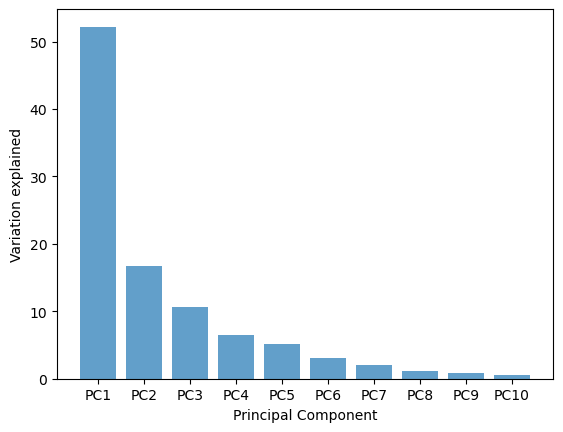

In [77]:
plt.style.use('default')
per_var = np.round(pca_model_with_ten_comp.explained_variance_ratio_*100,decimals = 1)
labels = ['PC'+str(x) for x in range(1,len(per_var)+1)]
plt.bar(x = range(1,len(per_var)+1),height=per_var,tick_label = labels,alpha=0.7, align='center')
plt.ylabel('Variation explained')
plt.xlabel('Principal Component')
plt.show()

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;"> e - Draw a horizontal line on the above plot to highlight the threshold of 90%

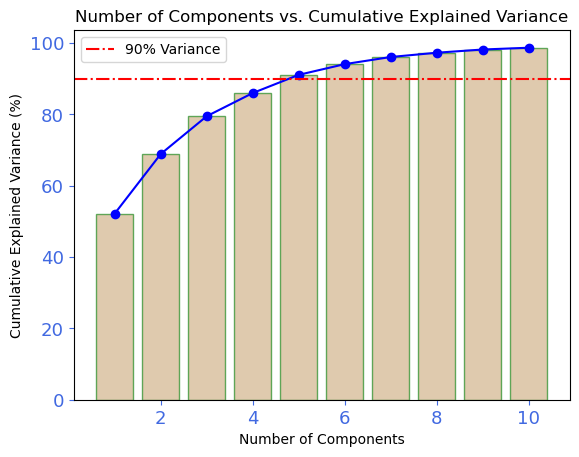

In [78]:
per_var = np.round(pca_model_with_ten_comp.explained_variance_ratio_ * 100, decimals=1)
cumulative_var = np.cumsum(per_var)
n_components = len(per_var)
plt.bar(range(1, n_components + 1), cumulative_var, align='center',
        color = {'tan'},edgecolor = 'forestgreen',alpha=0.7);
plt.plot(range(1, n_components + 1), cumulative_var, marker='o', linestyle='-', color='b');
plt.ylabel('Cumulative Explained Variance (%)');
plt.xlabel('Number of Components');
plt.tick_params(axis='x', labelsize=13, colors='royalblue');
plt.tick_params(axis='y', labelsize=13, colors='royalblue');
plt.title('Number of Components vs. Cumulative Explained Variance');
plt.axhline(y=90, color='r', linestyle='-.', label='90% Variance');
plt.legend();

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">f - Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

In [79]:
explained_variance_ratios = pca_model_with_ten_comp.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratios)
min_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Minimum components needed for 90% variance explained: {min_components}")

Minimum components needed for 90% variance explained: 5


#### With the help of the plot in the previous question and the previous Minimum components code, it can be confidently said that Minimum Components with 90% or above whose variance were explained is 5

In [80]:
pca_model_with_five_comp = PCA(n_components = 5)
pca_model_with_five_comp.fit(x_scaled)

PCA(n_components=5)

In [81]:
cov_matrix_five_comp = np.cov(x_scaled.T) 
print('Covariance Matrix \n%s', cov_matrix_five_comp)

Covariance Matrix 
%s [[ 1.00118343  0.68636217  0.79059726  0.69053363  0.09198453  0.14842463
   0.81247773 -0.78905557  0.81440865  0.67694334  0.76351002  0.81833828
   0.58575426 -0.25053864  0.23701356  0.15789336  0.29887839  0.36598446]
 [ 0.68636217  1.00118343  0.79280285  0.62276075  0.15444546  0.25188188
   0.84770943 -0.8218075   0.84576918  0.96297741  0.79520193  0.84019363
   0.92731344  0.05233142  0.14471964 -0.01144512 -0.10494782  0.04657999]
 [ 0.79059726  0.79280285  1.00118343  0.76908912  0.15929452  0.26536555
   0.90342716 -0.91177521  0.89389345  0.77443553  0.86160468  0.8884694
   0.70519293 -0.22829105  0.11406664  0.2671402   0.14777577  0.33545957]
 [ 0.69053363  0.62276075  0.76908912  1.00118343  0.66406299  0.44997021
   0.73468321 -0.7910345   0.70996999  0.57016627  0.79519036  0.72247019
   0.53726381 -0.18215173  0.05120657  0.17524855  0.38354044  0.47224412]
 [ 0.09198453  0.15444546  0.15929452  0.66406299  1.00118343  0.64920931
   0.10360911

In [82]:
pca_model_with_five_comp.explained_variance_ratio_

array([0.52200175, 0.16743902, 0.10556694, 0.06548539, 0.05093994])

In [83]:
e_vals_five_comp, e_vecs_five_comp = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs_five_comp)
print('\nEigenvalues \n%s' %e_vals_five_comp)

Eigenvectors 
[[ 2.75303704e-01  1.26699824e-01  1.20021442e-01 -7.87086696e-02
  -6.97518075e-02  1.43038819e-01  4.52605129e-01  5.64905205e-01
   4.84676252e-01  2.62889961e-01 -4.68654021e-02  1.11812699e-02
  -1.61538327e-01 -2.04375959e-03 -1.25235569e-03  5.49081564e-02
   5.25525969e-02 -6.28227375e-03]
 [ 2.93255195e-01 -1.25798029e-01  2.45130070e-02 -1.88672829e-01
   8.54644264e-02 -3.01212046e-01 -2.49743783e-01  1.78490304e-01
   1.87631464e-02 -1.01561315e-01  3.14194656e-03 -1.94628649e-01
  -2.29982476e-02  2.44082272e-02 -8.98379225e-02  3.78071743e-01
  -4.29962688e-01  5.33062551e-01]
 [ 3.04416264e-01  7.40164089e-02  5.56481927e-02  7.13302354e-02
  -3.97009403e-02 -1.40604801e-01  7.29693451e-02 -4.35523432e-01
   1.68090253e-01  2.09160196e-01 -7.06269499e-01 -2.49131951e-02
   2.26430189e-01  4.67468062e-05  2.41549813e-02 -5.38528246e-02
   1.42473241e-01  1.75567894e-01]
 [ 2.67824695e-01  1.89664273e-01 -2.74351923e-01  4.21775267e-02
   4.50522694e-02  2.48

In [84]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals_five_comp, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.20017525  68.94407774  79.50077203  86.04931125  91.14330551
  94.13978565  96.13062506  97.36541033  98.25072203  98.75957214
  99.12835171  99.38130019  99.5783218   99.72369981  99.84198373
  99.93492181  99.98020397 100.        ]


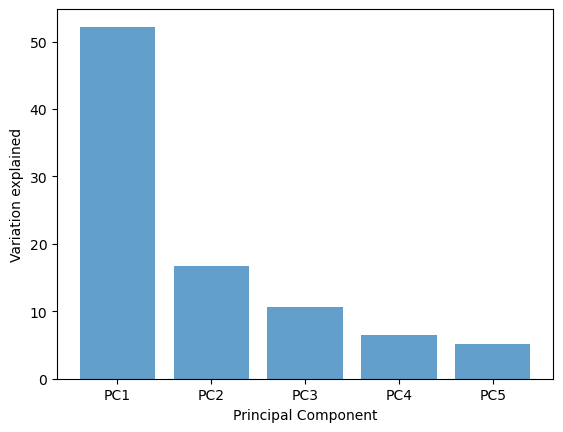

In [85]:
plt.style.use('default')
per_var = np.round(pca_model_with_five_comp.explained_variance_ratio_*100,decimals = 1)
labels = ['PC'+str(x) for x in range(1,len(per_var)+1)]
plt.bar(x = range(1,len(per_var)+1),height=per_var,tick_label = labels,alpha=0.7, align='center')
plt.ylabel('Variation explained')
plt.xlabel('Principal Component')
plt.show()

In [86]:
x_svm_model_with_five_comp = pca_model_with_five_comp.transform(x_scaled)

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">g - Train SVM model on components selected from above step. 

In [87]:
svm_model_with_five_comp = SVC()
svm_model_with_five_comp.fit(x_svm_model_with_five_comp,y)

SVC()

### Performance Metrics

In [88]:
y_pred_with_five_comp_svm = svm_model_with_five_comp.predict(x_svm_model_with_five_comp)

###### 1 : Scores of training and Testing Data

In [89]:
print('Score for Training Data : ',round(svm_model_with_five_comp.score(x_svm_model_with_five_comp,y),3))

Score for Training Data :  0.809


###### 2 :  Accuracy

In [90]:
print(accuracy_score(y,y_pred_with_five_comp_svm))

0.8085106382978723


In [91]:
def rightly_identified(actual, predictions):
    a = pd.DataFrame()
    for i in np.sort(actual.unique()):
        try:
            a.loc[i,'total_instances'] = len(actual[actual == i])
            a.loc[i, 'identified_right'] = pd.Series(predictions[actual == i]).value_counts()[i]
            a.loc[i, '%'] = round(100*pd.Series(predictions[actual == i]).value_counts()[i]/len(actual[actual == i]), 1)
        except:
            a.loc[i, '%'] = 0.0
    return a

In [92]:
pred_vs_actual_with_five_comp_svm = rightly_identified(y, y_pred_with_five_comp_svm)

In [93]:
pred_vs_actual_with_five_comp_svm

,total_instances,identified_right,%
bus,218.0,149.0,68.3
car,429.0,383.0,89.3
van,199.0,152.0,76.4


###### 3 : Precison /  Sensitivity / F1_Score / Suppot

In [94]:
print(classification_report(y,y_pred_with_five_comp_svm))

              precision    recall  f1-score   support

         bus       0.86      0.68      0.76       218
         car       0.84      0.89      0.87       429
         van       0.70      0.76      0.73       199

    accuracy                           0.81       846
   macro avg       0.80      0.78      0.79       846
weighted avg       0.81      0.81      0.81       846



###### 4 : Confusion Matrix

In [95]:
def con_matrix(actual, predictions):
    from sklearn.metrics import confusion_matrix
    matrix = pd.DataFrame(confusion_matrix(actual, predictions), columns = np.unique(actual), index = np.unique(actual))
    matrix.loc[:,'total_count_actual_class'] = matrix.sum(axis = 1)
    matrix.loc['total_count_predicted'] = matrix.sum(axis = 0)
    return matrix

con_matrix(y, y_pred_with_five_comp_svm)

,bus,car,van,total_count_actual_class
bus,149,39,30,218
car,10,383,36,429
van,14,33,152,199
total_count_predicted,173,455,218,846


### 2.4

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;"> a - Train another SVM on the components out of PCA. Tune the parameters to improve performance.

In [96]:
parameter_grid = [
    {'C' : [0.5,1,10,100],
    'gamma' : ['scale',1,0.1,0.01,0.001],
    'kernel' : ['rbf']}
]
optimal_parameters = GridSearchCV(
    SVC(),
    parameter_grid,
    cv = 5,
    scoring = 'accuracy',
    verbose = 0, 
)
optimal_parameters.fit(x_svm_model_with_five_comp,y)
print(optimal_parameters.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [97]:
svm_model_final = SVC(random_state = 42,C = 10,gamma = 0.1 )
svm_model_final.fit(x_svm_model_with_five_comp,y)

SVC(C=10, gamma=0.1, random_state=42)

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">b- Share best Parameters observed from above step.

The best parameters observed from your GridSearchCV step are:

`C: 10
gamma: 0.1
kernel: 'rbf'`


* Based on the parameter grid and cross-validation arrangement you supplied, these parameters represent the configuration that produced the maximum accuracy. These settings can help your SVM model perform better on your dataset by optimising it.

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">c- Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.

### Performance Metrics

In [98]:
y_pred_final_svm = svm_model_final.predict(x_svm_model_with_five_comp)

###### 1 : Scores of training and Testing Data

In [99]:
print('Score for Training Data : ',round(svm_model_final.score(x_svm_model_with_five_comp,y),3))

Score for Training Data :  0.892


###### 2 :  Accuracy

In [100]:
print(accuracy_score(y,y_pred_final_svm))

0.892434988179669


In [101]:
def rightly_identified(actual, predictions):
    a = pd.DataFrame()
    for i in np.sort(actual.unique()):
        try:
            a.loc[i,'total_instances'] = len(actual[actual == i])
            a.loc[i, 'identified_right'] = pd.Series(predictions[actual == i]).value_counts()[i]
            a.loc[i, '%'] = round(100*pd.Series(predictions[actual == i]).value_counts()[i]/len(actual[actual == i]), 1)
        except:
            a.loc[i, '%'] = 0.0
    return a

In [102]:
pred_vs_actual_final_svm = rightly_identified(y, y_pred_final_svm)

In [103]:
pred_vs_actual_final_svm

,total_instances,identified_right,%
bus,218.0,188.0,86.2
car,429.0,401.0,93.5
van,199.0,166.0,83.4


###### 3 : Precison /  Sensitivity / F1_Score / Suppot

In [104]:
print(classification_report(y,y_pred_final_svm))

              precision    recall  f1-score   support

         bus       0.88      0.86      0.87       218
         car       0.92      0.93      0.93       429
         van       0.85      0.83      0.84       199

    accuracy                           0.89       846
   macro avg       0.88      0.88      0.88       846
weighted avg       0.89      0.89      0.89       846



###### 4 : Confusion Matrix

In [105]:
def con_matrix(actual, predictions):
    from sklearn.metrics import confusion_matrix
    matrix = pd.DataFrame(confusion_matrix(actual, predictions), columns = np.unique(actual), index = np.unique(actual))
    matrix.loc[:,'total_count_actual_class'] = matrix.sum(axis = 1)
    matrix.loc['total_count_predicted'] = matrix.sum(axis = 0)
    return matrix

con_matrix(y, y_pred_final_svm)

,bus,car,van,total_count_actual_class
bus,188,21,9,218
car,8,401,20,429
van,17,16,166,199
total_count_predicted,213,438,195,846


### Relative improvement in performance in all the models

In [106]:
result = {}
result['Initial SVM Model with no n_components'] = pred_vs_actual_initial_svm.drop(columns= 'total_instances')
result['SVM Model with n_components'] = pred_vs_actual_with_five_comp_svm.drop(columns= 'total_instances')
result['Final SVM Model with n_components and parameter tuning'] = pred_vs_actual_final_svm.drop(columns= 'total_instances')

In [107]:
pd.concat(result, axis = 1)

Initial SVM Model with no n_components       SVM Model with n_components  \
                          identified_right     %            identified_right   
bus                                  214.0  98.2                       149.0   
car                                  421.0  98.1                       383.0   
van                                  195.0  98.0                       152.0   

          Final SVM Model with n_components and parameter tuning        
        %                                       identified_right     %  
bus  68.3                                              188.0      86.2  
car  89.3                                              401.0      93.5  
van  76.4                                              166.0      83.4

### Insights
* The performance of the model appears to be affected differently by the addition of n_components (using PCA for dimensionality reduction). After parameter adjustment, it increased the identification percentages for the "bus" and "van" categories but decreased the identification % for the "car" category.
* This shows that higher performance isn't always guaranteed by dimensionality reduction, and that the right amount of components and their effects on various classes must be carefully evaluated.`
* The total identification percentages for all three categories have increased as a result of parameter adjustment using GridSearchCV. Compared to the model with n_components but without parameter adjustment, the identification rate increased in each instance.`
* In conclusion, PCA performed better when parameters were tuned than when a general model was built with fewer clusters.`

### 2.5

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;">a - Explain pre-requisite/assumptions of PCA.

* 1: Since high-dimensional data can increase computational complexity, increase the risk of overfitting, and make visualisation difficult, PCA assisted us in reducing our model's dimensions from 10 to 5 and demonstrated the least amount of accuracy loss while also preventing the model from becoming overfit and noisy.
* 2: Information redundancy can result from highly correlated characteristics in your dataset, called multicollinearity. We were able to capture the most significant directions of variance and lessen the effects of multicollinearity with the aid of PCA.
* 3:Because high-dimensional data visualisation can be difficult. We were able to readily visualise the data in two or three dimensions because to PCA's assistance in reducing the data to a few primary components.
* 4:Due to the fact that PCA can be utilised as a preprocessing step before using other machine learning methods. It enhanced the convergence and performance of algorithm
* 5:Working with a lower-dimensional representation can streamline processing for specific analytical tasks, such as grouping or regression, and produce more comprehensible findings.

###### <span style="font-family: Arial;font-size:2em;color:#FFF8DC;"> b - Explain advantages and limitations of PCA.

### Advantages of PCA:
* Collinearity reduction: If the original features are heavily correlated, PCA can assist in locating and emphasising the underlying independent characteristics, hence minimising complications connected to multicollinearity.
* Reduced Dimensionality: The main benefit of PCA is its capacity to reduce the dataset's dimensionality while preserving as much variance as possible. This may result in more effective computation, enhanced visualisation, and lowered overfitting risk.
* Noise reduction: PCA can assist in removing noise and less significant fluctuations in the data by focusing on the directions of maximum variance. This may result in models that are more reliable and precise.
* Visualisation: PCA makes it possible to visualise high-dimensional data in 2D or 3D plots or other lower-dimensional formats. This can reveal patterns in the data's structure and linkages that may not have been seen in the original high-dimensional space.

### Limitations of PCA:
* Scaling's effect: PCA is sensitive to the original features' scaling. The variance computations may be dominated by features with greater scales, which could cause the results to be skewed.
* Linearity Assumption: PCA makes the assumption that linear combinations of the original characteristics can accurately reflect the data. PCA may not accurately reflect the true underlying structure if the underlying interactions are nonlinear.
* Loss of Interpretability: While PCA produces new features that capture the most important variation, these elements could not have the same straightforward and straightforward interpretation as the original features.
* Data Interpretation: How well the original features may be related to the primary components will determine how interpretable the results are. It can be difficult to discern the significance of the components in some situations.
